In [6]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import colors as clr
%matplotlib inline

In [7]:
@jit

def mandelbrot_maker(c, top):
    z = c
    for i in range(top):
        if abs(z) > 2:
            return i
        z = z ** 2 + c
    return 0

In [8]:
@jit

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, top):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    big_set = np.empty((width, height))
    for j in range(width):
        for k in range(height):
            big_set[j,k] = mandelbrot_maker(r1[j] + 1j*r2[k], top)
    return (r1, r2, big_set)

In [35]:
@jit
def mandelbrot_image(xmin, xmax, ymin, ymax, width = 10, height = 10, dpi = 5, top = 100):
    
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,top)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
   
    ax.imshow(z.T, cmap = "cividis")

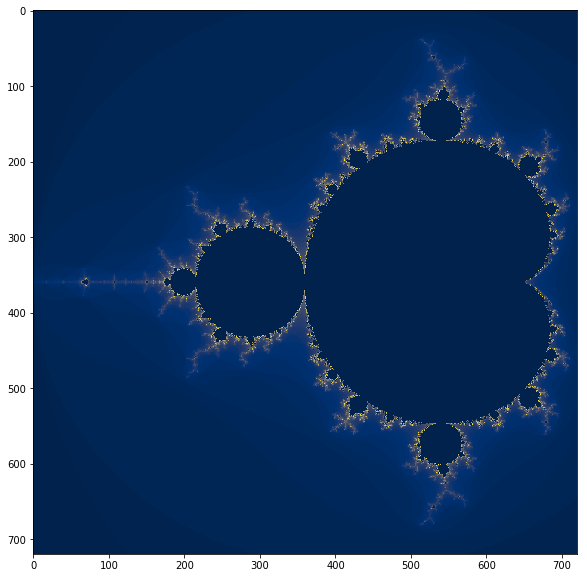

In [36]:
mandelbrot_image(-2.0,0.5,-1.25,1.25)